In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Analysing the data

In [11]:
%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float, array
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/drive/MyDrive/crime_data_2.csv")

df.head()

,State,UrbanPop,Murder,Assault,Rape,Total
0,Alabama,58,13.2,236,21.2,270.4
1,Alaska,48,10.0,263,44.5,317.5
2,Arizona,80,8.1,294,31.0,333.1
3,Arkansas,50,8.8,190,19.5,218.3
4,California,91,9.0,276,40.6,325.6


A) In the graph below we are comparing the population with the number of arrests made in each state

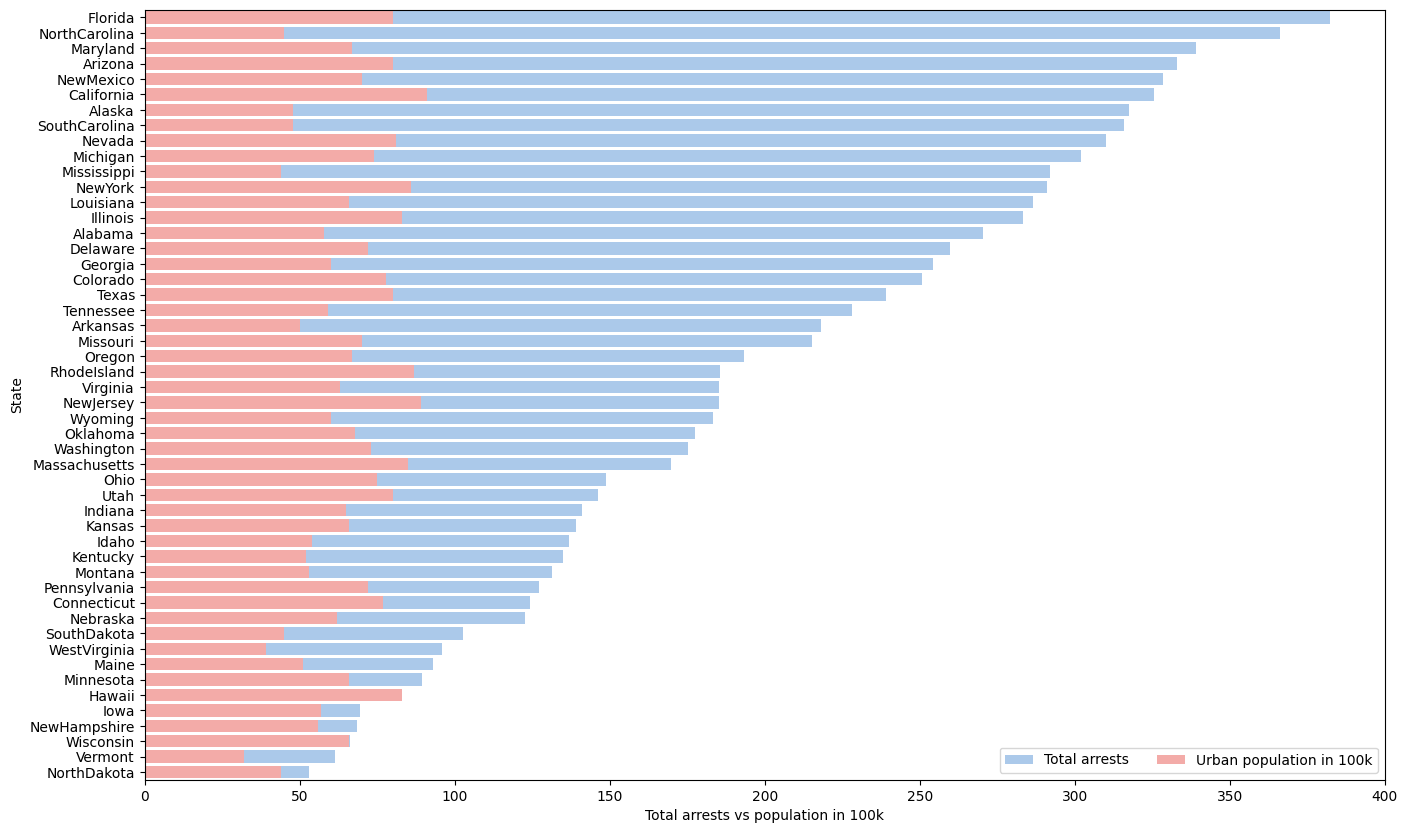

In [12]:
# Initializing the matplotlib figure

f, ax = plt.subplots(figsize=(16, 10))

# Loadin the dataset
stats = df.sort_values("Total", ascending=False)

# Ploting the total. x= and y= are actual column names
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="State", data=stats,
            label="Total arrests", color="b")

# Ploting the population
sns.barplot(x="UrbanPop", y="State", data=stats,
            label="Urban population in 100k", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="Total arrests vs population in 100k");

B) In the graph below we are seeing how the crimes are distributed in each state.

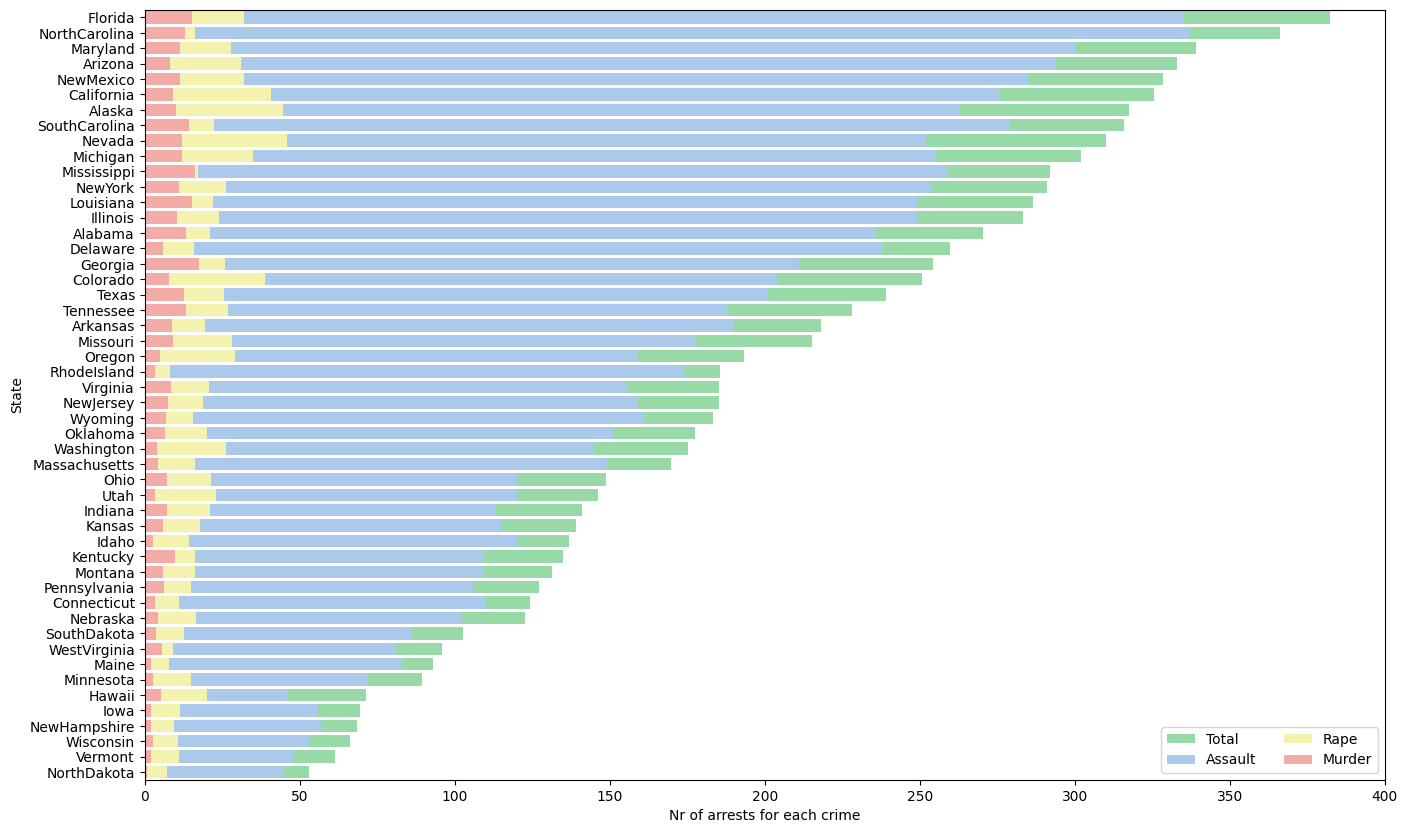

In [13]:
f, ax = plt.subplots(figsize=(16, 10))

stats = df.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="State", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="State", data=stats,
            label="Assault", color="b")

sns.barplot(x="Rape", y="State", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="State", data=stats,
            label="Murder", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="Nr of arrests for each crime");

We can clearly see that assault is the crime that is committed the most in most of the states

# Finding the Optimal number of clusters

We are plotting the elbow curve, to determine which number of clusters will give us the most optimal clustering

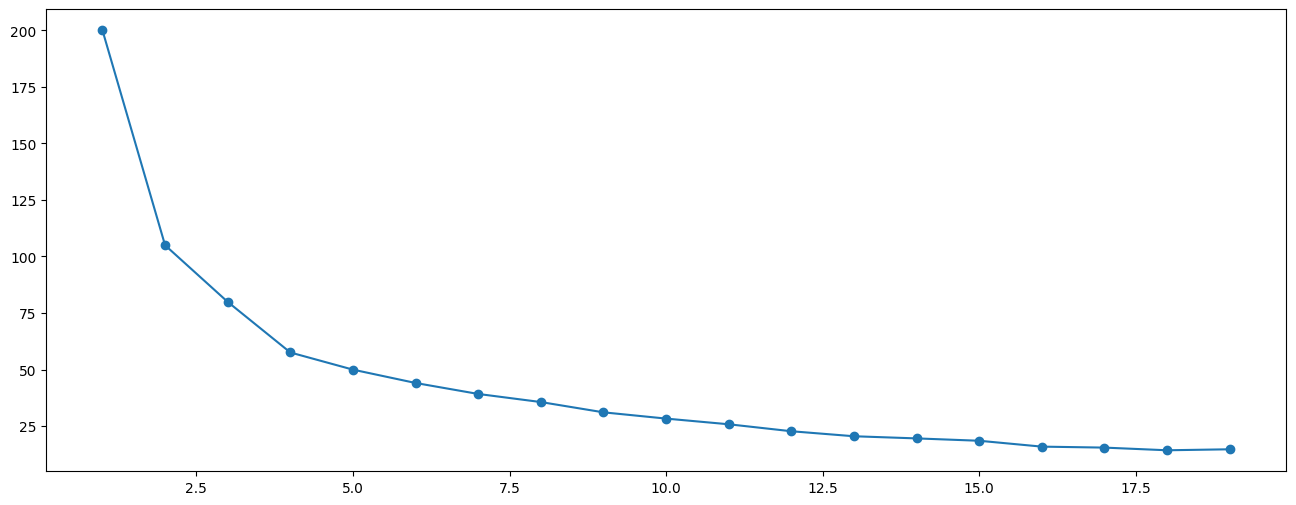

In [31]:
X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );


# Implementing k means

From the above graph, we concluded that 4 clusters are the optimal number of cluster for the above dataset.

In [35]:
X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

df['Crime_clusters'] = clusters.labels_
a=df.sort_values(by=['Crime_clusters'],ascending = True)
a.head()

,State,UrbanPop,Murder,Assault,Rape,Total,Crime_clusters
24,Missouri,70,9.0,178,28.2,215.2,0
46,Washington,73,4.0,145,26.2,175.2,0
45,Virginia,63,8.5,156,20.7,185.2,0
42,Texas,80,12.7,201,25.5,239.2,0
41,Tennessee,59,13.2,188,26.9,228.1,0


In the above table, we are sorting the data according to the clusters in which they belong

# Variable Correlation

Now that we have the number of clusters, we are trying to find the possible correlation between crimes i.e. does occurance of one crime affect the occurence of the other

a) First, we are trying to find if the population affects the rate of crime.

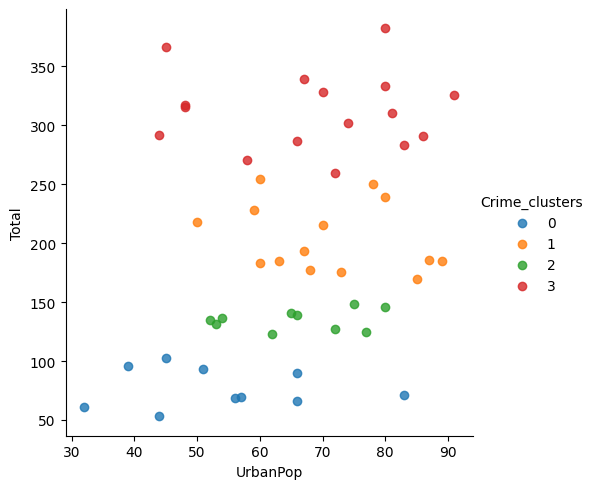

In [20]:
sns.lmplot(x='UrbanPop' ,y='Total', data=df,
        hue = "Crime_clusters",
        fit_reg=False);

From the above graph, we can conclude that high poulation does not equal high crime rate. This can be seen as, almost all populations have both high and low number of crimes. Thus we can conclude that the population of an area does not have any real effect on the number of crimes in that area.

b) Next, we will compare 2 features which are murder and assault to look for potential correlation.

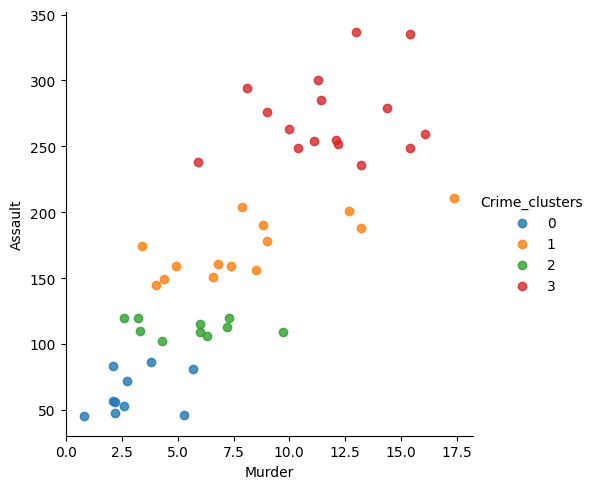

In [21]:
sns.lmplot(x= 'Murder',y='Assault',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False);

Plotting the centroid-

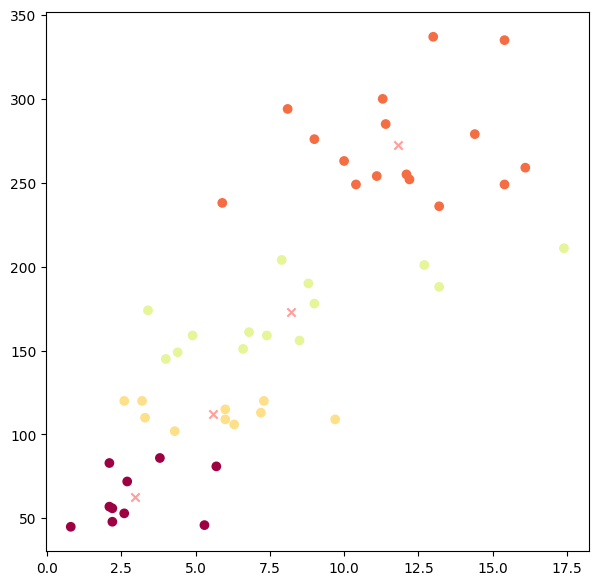

In [23]:
data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]);

From the above graph, we can clearly see a linear correlation, which means that if the rate of murders is high, the rate of assaults is also high. This can be an interesting point in crime analysis.

c) Finding correlation between murder and rape.

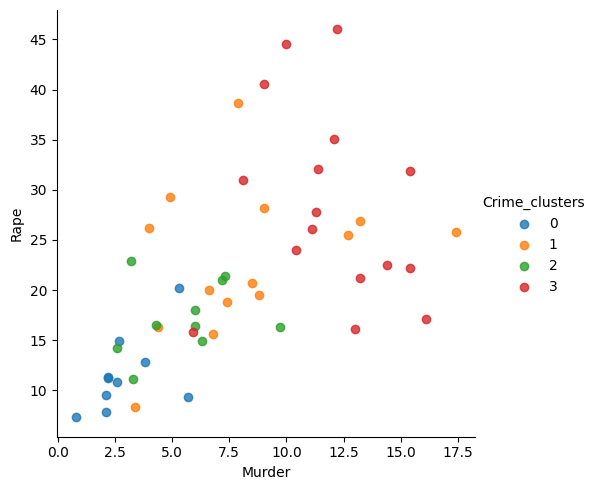

In [24]:
sns.lmplot(x= 'Murder',y='Rape',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False );

finding the centroid-

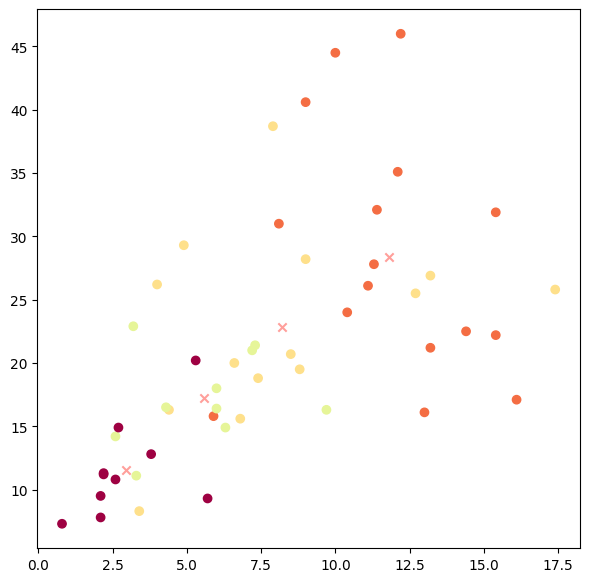

In [25]:
data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,2], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,2], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 

Unlike the murder vs assault graph, the amount of correlation in these 2 features is less, but not absent. As the rate of murders icreses the graph becomes more and more scattered.

d) Plotting the correlation between rape and assault

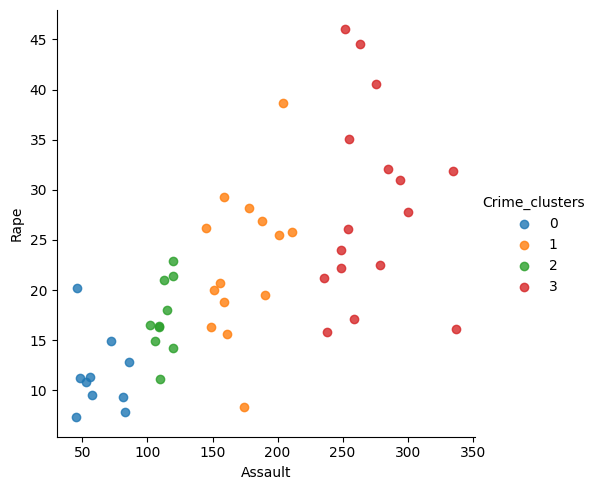

In [27]:
sns.lmplot( x='Assault',y='Rape',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False);

finding the centroid-

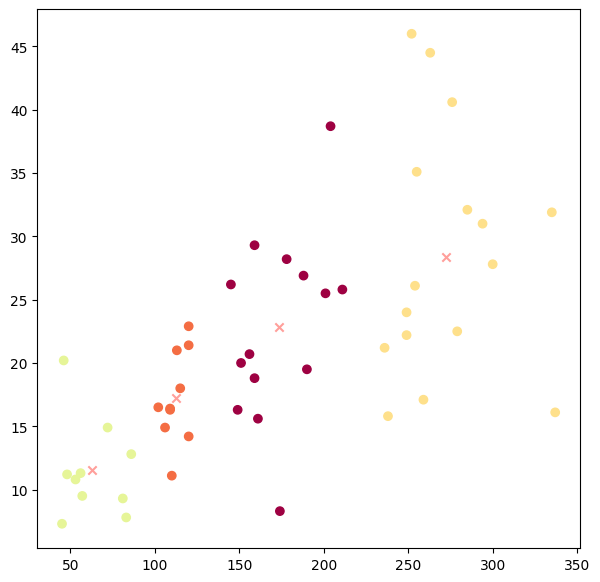

In [28]:
data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,1], centers[:,2], marker="x", color='r')
plt.scatter(data.iloc[:,1],data.iloc[:,2], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 

Like murder vs assault, there is clear correlation between rape vs assault as well.

# Validating the analysis

In order to check our above analysis we made the following correlation table.

In [36]:
variables_correlation = df[['Murder', 'Assault', 'Rape']]
variables_correlation.corr() 

,Murder,Assault,Rape
Murder,1.000000,0.801873,0.563579
Assault,0.801873,1.000000,0.665241
Rape,0.563579,0.665241,1.000000


True to our graphical analysis, we can see that murder vs assault have the highest correlation followed by rape vs assault.